In [1]:
import matplotlib.pyplot as plt
from pyLMS import *

'Time'

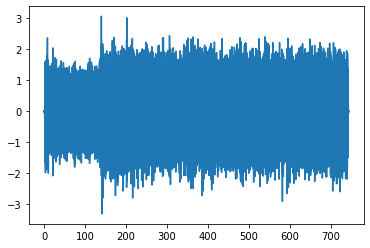

In [11]:
data = pyLMS('data/accelerometro.mat', 'Time')
plt.plot(data['signals']['x'], data['signals']['y'])
data['mags']['x']

{'x': 's', 'y': 'Pa'}

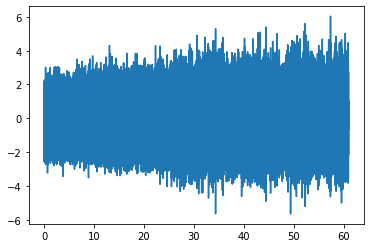

In [6]:
data = pyLMS('data/microfono.mat', 'Time')
plt.plot(data['signals']['x'], data['signals']['y'])
data['mags']
data['units']

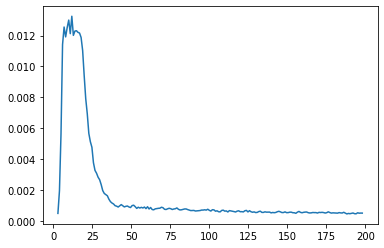

In [3]:
data = pyLMS('data/psd.mat', 'PSD')
plt.plot(data['signals']['x'], data['signals']['y'])

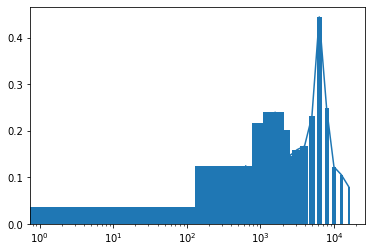

In [14]:
data = pyLMS('data/terzi_ottava.mat', 'Octave')
plt.bar(data['signals']['x'],data['signals']['y'], width = 1000)
plt.plot(data['signals']['x'],data['signals']['y'])
plt.xscale('log')